# Chapter 3.4 - Elliptical Orbits ($e < 1$)

For an elliptical orbit, we use the first integral relationship:

$$\int\frac{dx}{\left(a + b\cos x\right)^2} = \frac{1}{\left(a^2 - b^2\right)^{3/2}}\left[2a\tan^{-1}\left(\sqrt{\frac{a - b}{a + b}}\tan\frac{x}{2}\right)-\frac{b\sqrt{a^2 - b^2}\sin x}{a + b \cos x}\right]$$

where $a = 1$ and $b = e < 1$. Thus, the equation becomes:

$$\int\frac{d\theta}{\left(1 + e\cos \theta\right)^2} = \frac{1}{\left(1 - e^2\right)^{3/2}}\left[2\tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2}\right)-\frac{e\sqrt{1 - e^2}\sin \theta}{1 + e \cos \theta}\right]$$

## Mean Anomaly

We define the term in the square brackets to be the **mean anomaly**, $M_e$, where the subscript $e$ indicates that this is for the ellipse. We will have different equations for the parabola and hyperbola.

The mean anomaly is a monotonically increasing function of the true anomaly. This is good because it means that $M_e$ can be used in place of $\theta$ for all four quadrants on the $x$-$y$ plane. If $M_e$ had a peak, we would have to be concerned about which quadrant we were in.

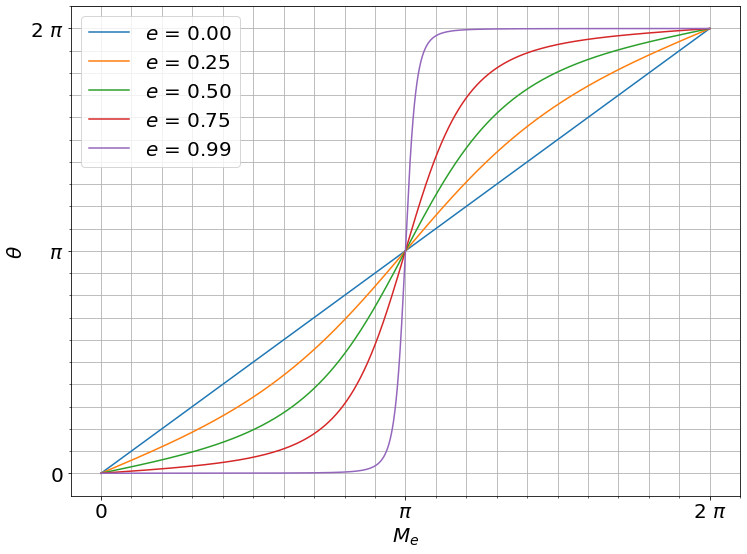

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import (MultipleLocator, FuncFormatter,
                               AutoMinorLocator)
plt.rc("font", size=20)

n_points = 500
e_vals = np.array((0, 0.25, 0.5, 0.75, 0.99))
E = np.linspace(0, np.pi, n_points)

fig_2, ax_2 = plt.subplots(figsize=(12, 9))
ax_2.set_xlabel("$M_e$")
ax_2.set_ylabel(r"$\theta$")
ax_2.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_2.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi: r"$\pi$", 2*np.pi: r"2 $\pi$"}.get(val, "")))
ax_2.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_2.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi: r"$\pi$", 2*np.pi: r"2 $\pi$"}.get(val, "")))
ax_2.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax_2.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax_2.grid(which="both")
for e in e_vals:
    M_e = E - e * np.sin(E)
    theta = np.arccos((e - np.cos(E)) / (e * np.cos(E) - 1))
    M_e = np.hstack((M_e, 2 * np.pi - M_e[::-1]))
    theta = np.hstack((theta, 2 * np.pi - theta[::-1]))
    ax_2.plot(theta, M_e, label=f"$e$ = {e:.2F}")

ax_2.legend();

Notice that when $e = 0$ (a circular orbit), the mean anomaly and true anomaly are equal.

In terms of the mean anomaly, we can write:

$$M_e = \frac{\mu^2}{h^3} t \left(1 - e^2\right)^{3/2}$$

If we know the period of the elliptical orbit, we can simplify the equation for the mean anomaly:

$$M_e = \frac{2\pi}{T}t$$

which is the same as the equation for a circular orbit, except that we are using the mean anomaly instead of the true anomaly.

## Mean Motion

By further defining a quantity called the **mean motion**, $n$:

$$n = \frac{2\pi}{T}$$

we can simplify the equation of the mean anomaly more:

$$M_e = n t$$

In a real elliptical orbit, the angular velocity of the position vector is not constant. This is a consequence of Kepler's Second Law, which says that equal areas are swept out in equal times. For this to hold, the object must have a larger angular velocity near periapsis and a smaller angular velocity near apoapsis.

The mean motion, on the other hand, is the angular velocity that an orbiting mass would have, if it could have a constant angular velocity. The mean anomaly, then, is the azimuth position of this imaginary mass moving with constant angular velocity, as a function of time.

Notice that near periapsis ($\theta = 0$), the mean anomaly changes very little while the true anomaly changes a lot. This is because the true angular velocity is much larger than the mean motion near periapsis. The inverse is true near apoapsis ($\theta = \pi$).

## Eccentric Anomaly

We can simplify the equation for $M_e$ even further by using an auxiliary angle, $E$, called the eccentric anomaly. $E$ is defined as the angle from the $x$ axis to a point on a circle that circumscribes the orbital ellipse and where the point is located vertically above a point with true anomaly $\theta$ on the ellipse.

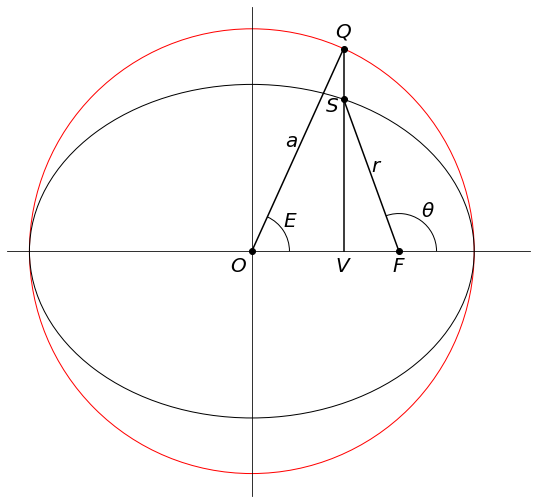

In [2]:
import matplotlib.patches as mpatch

circle_radius = 1
ellipse_semimajor = 2 * circle_radius
a = ellipse_semimajor / 2
ellipse_semiminor = 1.5 * circle_radius
b = ellipse_semiminor / 2

ellipse_focus = np.sqrt(a**2 - b**2)
e = ellipse_focus / a
theta = np.radians(110)
r = a * (1 - e**2) / (1 + e * np.cos(theta))
r_p = a * (1 - e)
x_ellipse = r * np.cos(theta) + ellipse_focus
y_ellipse = r * np.sin(theta)

E = 2 * np.arctan(np.sqrt((1 - e) / (1 + e)) * np.tan(theta / 2))
x_E = a * np.cos(E)
y_E = a * np.sin(E)

fig, ax = plt.subplots(figsize=(12, 9))
ax.set_aspect("equal")
ax.set_xlim(-1.1, 1.25)
ax.set_ylim(-1.1, 1.1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.xaxis.set_tick_params(bottom=False, top=False, which="both", labelbottom=False)
ax.yaxis.set_tick_params(left=False, right=False, which="both", labelleft=False)

# Move remaining spines to the center
ax.spines["bottom"].set_position("zero")  # spine for xaxis
ax.spines["left"].set_position("zero")  # spine for yaxis

ax.plot((ellipse_focus, x_ellipse), (0, y_ellipse), "k-o")
ax.plot((0, x_E), (0, y_E), "k-o")
ax.plot((x_E, x_E), (0, y_E), "k-")
ax.add_patch(mpatch.Circle((0, 0), circle_radius, edgecolor="red", facecolor="None"))
ax.add_patch(mpatch.Ellipse((0, 0), ellipse_semimajor, ellipse_semiminor, edgecolor="black", facecolor="None"))
ax.add_patch(mpatch.Arc((ellipse_focus, 0), r_p, r_p, theta2=np.degrees(theta)))
ax.add_patch(mpatch.Arc((0, 0), r_p, r_p, theta2=np.degrees(E)))

ax.annotate("$O$", xy=(0, 0), xytext=(-5, -5), textcoords="offset points", ha="right", va="top")
ax.annotate("$V$", xy=(x_E, 0), xytext=(0, -5), textcoords="offset points", ha="center", va="top")
ax.annotate("$F$", xy=(ellipse_focus, 0), xytext=(0, -5), textcoords="offset points", ha="center", va="top")
ax.annotate("$S$", xy=(x_ellipse, y_ellipse), xytext=(-5, -7), textcoords="offset points", ha="right", va="center")
ax.annotate("$Q$", xy=(x_E, y_E), xytext=(0, 7), textcoords="offset points", ha="center", va="bottom")
ax.annotate(r"$\theta$", xy=(r_p / 2 * np.cos(theta / 2) + ellipse_focus, r_p / 2 * np.sin(theta / 2)), ha="left", va="bottom")
ax.annotate("$E$", xy=(r_p / 2 * np.cos(E / 2), r_p / 2 * np.sin(E / 2)), ha="left", va="bottom")
ax.annotate("$a$", xy=(x_E / 2, y_E / 2), ha="right", va="bottom")
ax.annotate("$r$", xy=(r / 2 * np.cos(theta) + ellipse_focus, r / 2 * np.sin(theta)), ha="left", va="bottom");

Since $M_e$ is given in terms of $\theta$, we need to relate $E$ to $\theta$ to simplify. From the figure above, we can see that the distance from $O$ to $V$ is $a\cos E$ in terms of the eccentric anomaly, or $ae + r\cos\theta$ in terms of the true anomaly, where $ae$ is the distance from $O$ to $F$, and $\cos\theta$ is negative for $\pi/2 < \theta < 3\pi/2$. Therefore,

$$a\cos E = ae + r\cos\theta$$

Replacing $r$ with the orbit equation in terms of the semimajor axis and simplifying, we find:

$$\cos E = \frac{e + \cos\theta}{1 + e\cos\theta}$$

or, solving for $\theta$:

$$\cos\theta = \frac{e - \cos E}{e\cos E - 1}$$

These equations allow us to solve for $E$ given $\theta$, provided that $0 < \theta < \pi$. For $0 < \theta < 2 \pi$, the equation is multivalued, and there are two values for $E$, one between $0$ and $\pi$, and the other between $\pi$ and $2\pi$. By applying some trigonometric transformations, we can write:

$$E = 2 \tan^{-1}\left(\sqrt{\frac{1 - e}{1 + e}}\tan\frac{\theta}{2}\right)$$(eccentric-anomaly-theta)

The inverse tangent function is not multivalued for a given value of $\theta$, so this resolves the problem.

```{note}
**Note:** Eq. {eq}`eccentric-anomaly-theta` can be solved in Python with `np.arctan()` and in Matlab with `atan()`. It is not necessary to use `np.arctan2()` or `atan2()`. Make sure all your arguments are in terms of radians!
```

## Kepler's Equation

Combining these equations yields **Kepler's Equation**:

$$M_e = E - e \sin E$$

This gives the relationship between mean anomaly and eccentric anomaly. The value of $M_e$ monotonically increases as a function of $E$, as shown in the figure below for several values of $e$.

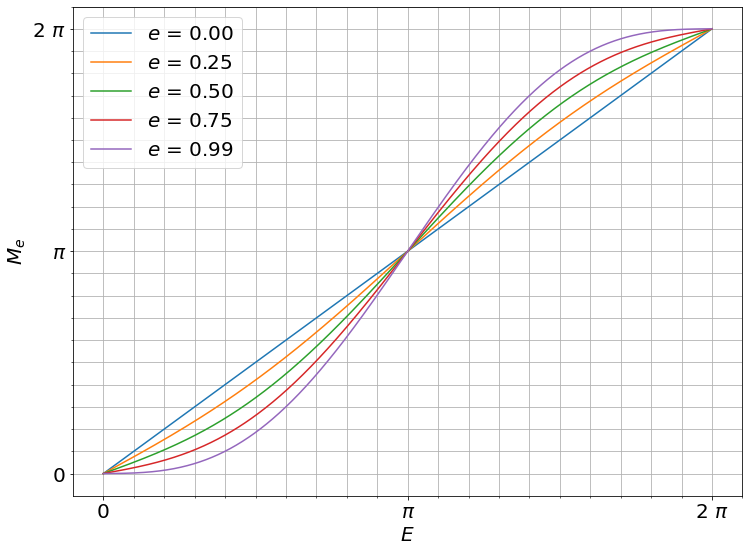

In [3]:
n_points = 500
e_vals = np.array((0, 0.25, 0.5, 0.75, 0.99))
E = np.linspace(0, np.pi, n_points)

fig_1, ax_1 = plt.subplots(figsize=(12, 9))
ax_1.set_xlabel("$E$")
ax_1.set_ylabel(r"$M_e$")
ax_1.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_1.xaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi: r"$\pi$", 2*np.pi: r"2 $\pi$"}.get(val, "")))
ax_1.yaxis.set_major_locator(MultipleLocator(base=np.pi))
ax_1.yaxis.set_major_formatter(FuncFormatter(lambda val, pos: {0: "0", np.pi: r"$\pi$", 2*np.pi: r"2 $\pi$"}.get(val, "")))
ax_1.xaxis.set_minor_locator(AutoMinorLocator(n=10))
ax_1.yaxis.set_minor_locator(AutoMinorLocator(n=10))
ax_1.grid(which="both")
for e in e_vals:
    M_e = E - e * np.sin(E)
    M_e = np.hstack((M_e, 2 * np.pi - M_e[::-1]))
    ax_1.plot(np.hstack((E, 2 * np.pi - E[::-1])), M_e, label=f"$e$ = {e:.2F}")

ax_1.legend();

Given a value of the true anomaly $\theta$, the eccentric anomaly $E$ can be calculated from Eq. {eq}`eccentric-anomaly-theta`. Then, Kepler's Equation can be solved to find $M_e$, and the time since periapsis is found by:

$$t = \frac{M_e}{2\pi} T$$

If, on the other hand, we are given the time since periapsis and want to find the true anomaly, we can solve the previous equation for $M_e$. Then, we need to solve Kepler's equation. Unfortunately, this equation is transcendental in $E$, so it cannot be solved analytically. We need to use a numerical method, such as Newton's method, to solve the equation.

For Newton's method, we seek the roots of a function, $f(E) = 0$. In this case, we can rearrange Kepler's equation as:

$$f(E) = E - e\sin E - M_e$$

It is also convenient to supply the derivative, when it is available, since this improves the convergence rate of the algorithm. The derivative is:

$$\frac{d f(E)}{d E} = f'(E) = 1 - e\cos E$$

Finally, we can directly write the radial position in terms of the eccentric anomaly. By replacing $\cos\theta$ in the orbit equation with the relationship in terms of $E$, we find:

$$r = \frac{a\left(1 - e^2\right)}{1 + e\left(\frac{e - \cos E}{e\cos E - 1}\right)} = a\left(1 - e\cos E\right)$$

## Time-Averaged Radial Position

In a previous section, we derived the true anomaly-averaged radial position, $\overline{r}_{\theta}$. Now that we have a relationship with time (via $E$), we can find the time-averaged radial position:

$$\overline{r}_t = \frac{1}{T}\int_0^T r dt$$

Replacing $M_e$ with Kepler's equation, and differentiating, we find:

$$dt = \frac{T}{2\pi}\left(1 - e\cos E\right) dE$$

Plugging this equation in for $dt$ and changing the limits of integration to be in terms of $E$, we find:

$$\overline{r}_t = a\left(1 + \frac{e^2}{2}\right)$$

Finally, combining this with the equation for the true anomaly-averaged radial position, we find:

$$\overline{r}_{\theta} = a\sqrt{3 - 2\frac{\overline{r}_t}{a}}$$

## Infinite Series Solutions of Kepler's Equation

Although there are no analytical solutions for Kepler's equation, several people have developed infinite series solutions. The first was developed by Lagrange:

$$E = M_e + \sum_{n = 1}^{\infty}a_n e^n$$

where the coefficients $a_n$ are given by:

$$a_n = \frac{1}{2^{n - 1}} \sum_{k=0}^{\mathrm{floor}(n/2)}(-1)^k\frac{1}{\left(n - k\right)!k!}\left(n - 2k\right)^{n - 1}\sin\left[\left(n - 2k\right)M_e\right]$$

and where $\mathrm{floor}(x)$ means to take the next lowest integer relative to the argument.

```{margin}
**Note:** Sacchetti {cite}`Sacchetti2020` states that Italian astronomer Francesco Carlini was the first to prove the existence of the convergence limit for the Lagrange series, not Laplace, who completed his work five years after Carlini. DRAMA!
```

This infinite series converges for $e < 0.6627434193$, a limit that was proven by Laplace, and is therefore typically called the Laplace limit. For larger values of $e$, the series diverges.

Another infinite series was developed by Bessel, which converges for all $e < 1$:

$$E = M_e + \sum_{n=1}^{\infty}\frac{2}{n} J_n(ne)\sin nM_e$$

where $J_n$ are the Bessel functions of the first kind, defined by their own infinite series:

$$J_n(x) = \sum_{k=0}^{\infty}\frac{\left(-1\right)^k}{k!\left(n + k\right)!}\left(\frac{x}{2}\right)^{n+ k}$$

There are other feasible series solutions to Kepler's equation, some of which are discussed by Colwell {cite}`Colwell1992`.